**INTRODUCCIÓN**

Aprendizaje profundo: una de las técnicas de aprendizaje automático que aprende características directamente de los datos.

Por qué el aprendizaje profundo: cuando aumenta la cantidad de datos, las técnicas de aprendizaje automático son insuficientes en términos de rendimiento y el aprendizaje profundo brinda un mejor rendimiento como la precisión.

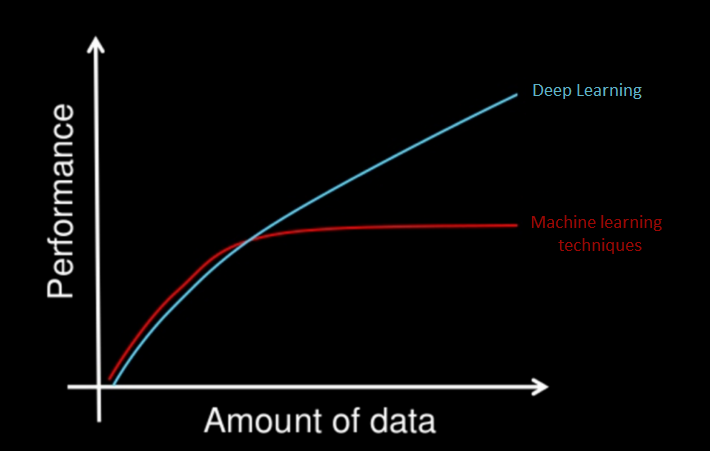

**¿Qué es una cantidad grande?:**

Es difícil de responder, pero intuitivamente 1 millón de muestras es suficiente para decir "gran cantidad de datos"

**Campos de uso del aprendizaje profundo:** 

Reconocimiento de voz, clasificación de imágenes, procesamiento de lenguaje natural (PNL) o sistemas de recomendación

**¿Cuál es la diferencia entre el aprendizaje profundo y el aprendizaje automático?**

El aprendizaje automático cubre el aprendizaje profundo.
A las funciones se les asigna el aprendizaje automático de forma manual.
Por otro lado, el aprendizaje profundo aprende características directamente de los datos.

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/CTIC_UNI/DATA_SCIENCE/COURSE_01_MAY_2022/SESION06/data/"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

OnlineRetail.csv
sonar.all-data.csv
WholesaleCustomersData.csv
X.npy
Y.npy



**Descripción general del conjunto de datos**

Usaremos el "conjunto de datos de dígitos del lenguaje de señas" para este tutorial.
En estos datos hay 2062 imágenes de dígitos en lenguaje de señas.
Como sabes, los dígitos son del 0 al 9. Por lo tanto, hay 10 signos únicos.
Al comienzo del tutorial usaremos solo los signos 0 y 1 por simplicidad.
En datos, el signo cero está entre los índices 204 y 408. El número del signo cero es 205.
También el signo uno está entre los índices 822 y 1027. El número de un signo es 206. Por lo tanto, usaremos 205 muestras de cada clase (etiquetas).
Nota: En realidad, la muestra 205 es muy, muy, muy pequeña para el aprendizaje profundo. 
Preparemos nuestras matrices X e Y. X es una matriz de imágenes (signos cero y uno) e Y es una matriz de etiquetas (0 y 1).

(-0.5, 63.5, 63.5, -0.5)

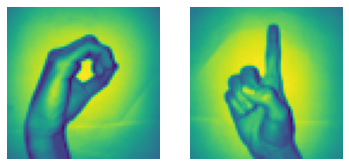

In [5]:
# load data set
x_l = np.load('/content/drive/MyDrive/CTIC_UNI/DATA_SCIENCE/COURSE_01_MAY_2022/SESION06/data/X.npy')
Y_l = np.load('/content/drive/MyDrive/CTIC_UNI/DATA_SCIENCE/COURSE_01_MAY_2022/SESION06/data/Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [8]:
# Unir una secuencia e arreglos a lo largo del eje row
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


La dimension X es (410, 64, 64)
410 significa que tenemos 410 imágenes (signos cero y uno)

64 significa que el tamaño de nuestra imagen es 64x64 (64x64 píxeles)

La dimension de Y es (410,1)
410 significa que tenemos 410 etiquetas (0 y 1)

Dividamos X e Y en conjuntos de entrenamiento y prueba.
test_size = porcentaje del tamaño de la prueba. prueba = 15% y entrenar = 75%

random_state = usar la misma semilla mientras se aleatoriza. Significa que si llamamos a train_test_split repetidamente, siempre crea la misma distribución de tren y prueba porque tenemos el mismo estado aleatorio.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

Ahora tenemos una matriz de entrada tridimensional (X), por lo que debemos aplanarla (2D) para usarla como entrada para nuestro primer modelo de aprendizaje profundo.

Nuestra matriz de etiquetas (Y) ya está plana (2D), así que la dejamos así.
Vamos a aplanar la matriz X (matriz de imágenes).

In [10]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


Como puede ver, tenemos 348 imágenes y cada imagen tiene 4096 píxeles en la matriz del tren de imágenes.

Además, tenemos 62 imágenes y cada imagen tiene 4096 píxeles en la matriz de prueba de imagen.


In [11]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


Que hicimos hasta este punto:

Escogimos nuestras etiquetas (clases) que son signo cero y signo uno
Crear y aplanar conjuntos de pruebas y entrenamiento
Nuestras entradas finales (imágenes) y salidas (etiquetas o clases) se ven así:

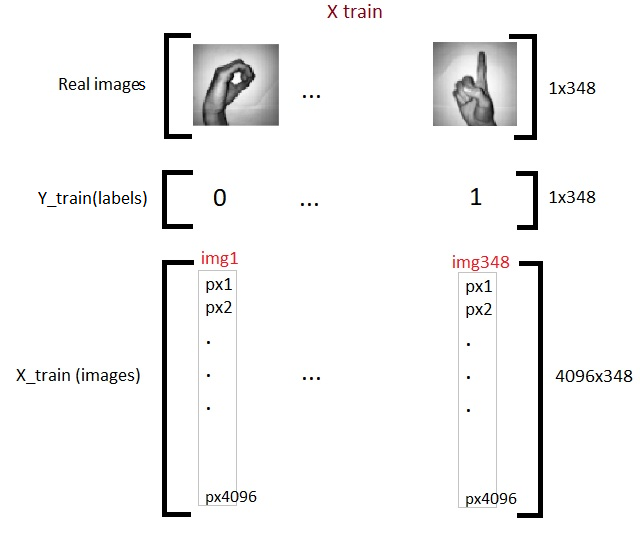

 Ahora veamos el gráfico de cálculo de la regresión logística

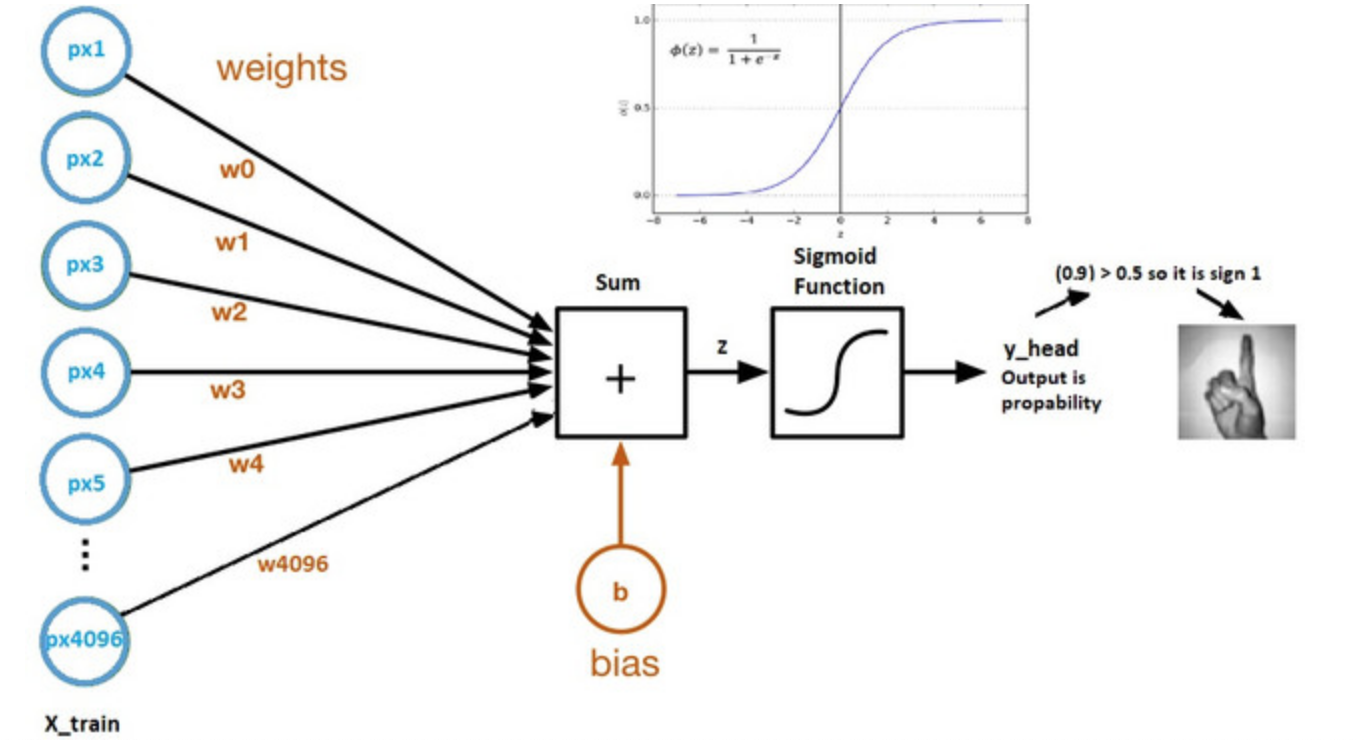

**Inicializando parámetros:**

Como sabemos, la entrada son nuestras imágenes que tienen 4096 píxeles (cada imagen en x_train).

Cada píxel tiene pesos propios.

El primer paso es multiplicar cada píxel con sus propios pesos.

La pregunta es ¿cuál es el valor inicial de los pesos?

Hay algunas técnicas que se explicaran en la red neuronal artificial, pero por ahora los pesos iniciales son 0.01.

¿Cuál es la forma de la matriz de pesos? Como comprenderemos del gráfico de cálculo de la regresión logística, es (4096,1)

También el sesgo inicial es 0.

In [12]:
# short description and example of definition (def)
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [13]:
#w,b = initialize_weights_and_bias(4096)

Forward Propagation:

Todos los pasos desde el ingreso de los píxeles hasta el costo se denominan forward propagation.

z = (w.T)x + b => en esta ecuación sabemos que x es una matriz de píxeles, sabemos w (pesos) y b (sesgo), por lo que el resto es cálculo. 
(T es la transpuesta)

Luego ponemos z en la función sigmoide que devuelve y_head (probabilidad). 

Luego calculamos la función de pérdida (error).

La función de costo es la suma de todas las pérdidas (errores).

Comencemos con z y la definición sigmoidea de escritura (método) que toma z como parámetro de entrada y devuelve y_head (probabilidad)

In [14]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [15]:
y_head = sigmoid(0)
y_head

0.5

La expresión matemática de la función de pérdida (error) es:

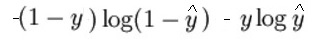

In [16]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    return cost 

**Algoritmo de optimización con descenso de gradiente**



In [17]:
# In backward propagation we will use y_head that found in forward progation
# Therefore instead of writing backward propagation method, lets combine forward propagation and backward propagation
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  is for scaling
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  is for scaling
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  is for scaling
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [18]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # updating(learning) parameters is number_of_iterarion times
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [19]:
 # prediction
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


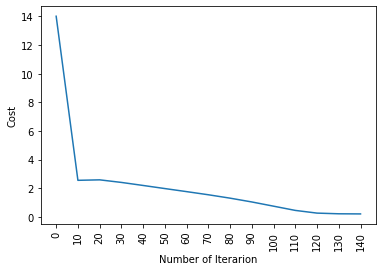

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [20]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

**Logistic Regression with Sklearn**

In [21]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


**Artificial Neural Network (ANN)**

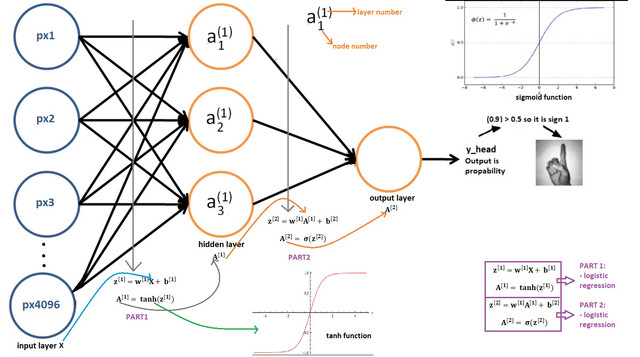

In [22]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

**Forward propagation**


In [23]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

**Loss function and Cost function**

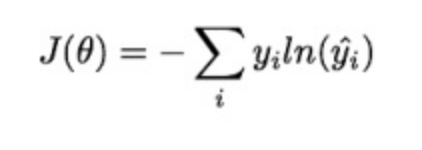

In [24]:
# Compute cost
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

**Backward propagation**

In [25]:
# Backward Propagation
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

**Update Parameters**

In [26]:
# update parameters
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

In [27]:
# prediction
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

**Crear Modelo**

Cost after iteration 0: 0.310856
Cost after iteration 100: 0.329879
Cost after iteration 200: 0.322921
Cost after iteration 300: 0.276152
Cost after iteration 400: 0.219697
Cost after iteration 500: 0.171607
Cost after iteration 600: 0.135830
Cost after iteration 700: 0.110605
Cost after iteration 800: 0.092556
Cost after iteration 900: 0.079147
Cost after iteration 1000: 0.068819
Cost after iteration 1100: 0.060623
Cost after iteration 1200: 0.053953
Cost after iteration 1300: 0.048400
Cost after iteration 1400: 0.043681
Cost after iteration 1500: 0.039591
Cost after iteration 1600: 0.035992
Cost after iteration 1700: 0.032796
Cost after iteration 1800: 0.029948
Cost after iteration 1900: 0.027403
Cost after iteration 2000: 0.025108
Cost after iteration 2100: 0.023020
Cost after iteration 2200: 0.021124
Cost after iteration 2300: 0.019437
Cost after iteration 2400: 0.017971


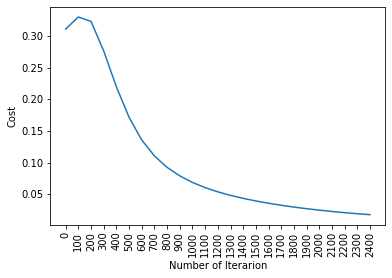

train accuracy: 99.71264367816092 %
test accuracy: 95.16129032258064 %


In [28]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

**L Layer Neural Network**

In [29]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [30]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library
def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 1s 3ms/step - loss: 0.6934 - accuracy: 0.5345
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5431
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5431
Epoch 4/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5431
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6888 - accuracy: 0.5431
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5431
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6866 - accuracy: 0.5431
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5431
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6836 - accuracy: 0.5431
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.6826 - accuracy: 0.5431
Epoch 11/100
8/8 [===========